#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
import json
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

#**2. Preprocesamiento de Datos**


---


In [2]:
df_banco = pd.read_csv("../data/german_credit.csv")
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [4]:
def duration_in_month(x:int):
    if x >= 1 and x < 12:
        return 1
    elif x >= 12 and x < 24:
        return 2
    elif x >= 24 and x < 36:
        return 3
    elif x >= 36 and x < 48:
        return 4
    elif x >= 48 and x < 60:
        return 5
    elif x >= 60 and x <= 72:
        return 6

def credit_amount(x:int):
    if x >= 1 and x < 1000:
        return 1
    elif x >= 1000 and x < 2000:
        return 2
    elif x >= 2000 and x < 3000:
        return 3
    elif x >= 3000 and x < 4000:
        return 4
    elif x >= 4000 and x < 5000:
        return 5
    elif x >= 5000 and x < 60000:
        return 6
    elif x >= 6000 and x < 7000:
        return 7
    elif x >= 7000 and x < 8000:
        return 8
    elif x >= 8000 and x < 9000:
        return 9
    elif x >= 9000 and x < 10000:
        return 10
    elif x >= 10000 and x < 11000:
        return 11
    elif x >= 11000 and x < 12000:
        return 12
    elif x >= 12000 and x < 13000:
        return 13
    elif x >= 13000 and x < 14000:
        return 14
    elif x >= 14000 and x < 15000:
        return 15
    elif x >= 16000 and x < 17000:
        return 16
    elif x >= 17000 and x < 18000:
        return 17
    elif x >= 18000 and x < 19000:
        return 18
    elif x >= 18000 and x < 19000:
        return 19
    elif x >= 19000 and x <= 20000:
        return 20

def Age(x:int):
    if x >= 18 and x < 30:
        return 1
    elif x >= 30 and x < 40:
        return 2
    elif x >= 40 and x < 50:
        return 3
    elif x >= 50 and x < 60:
        return 4
    elif x >= 60 and x < 70:
        return 5
    elif x >= 70 and x <= 80:
        return 6
    
       

In [5]:
def func_varias(df:pd.DataFrame, column:str):
    # if column == 'default':
    #     df[column] = df[column].apply(lambda x: 'Good customer' if x==0 else 'Bad customer')
    if column == 'duration_in_month':
        df[column] = df[column].apply(lambda x: duration_in_month(x))
    elif column == 'credit_amount':
        df[column] = df[column].apply(lambda x: credit_amount(x))
    elif column == 'age':
        df[column]  = df[column].apply(lambda x: Age(x))
    return df

        


In [6]:
with open('../data/datos.json', 'r') as file:
    datos = json.load(file)

In [7]:
###Tu función procesar_datos() y tu código aqui.
def procesar_datos(df: pd.DataFrame):
    df = df.drop_duplicates()
    for column in df.columns:
        if df[column].dtype != 'int64':
            df[column] = df[column].map(datos[column])
        
    return df

In [8]:
df_banco = procesar_datos(df_banco)
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


In [9]:
valores_nulos  = df_banco.isnull().sum()
valores_nulos

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [10]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

#**3. Exploración de Datos**


---


In [11]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

,personal_status_sex,age,duration_in_month,credit_amount,default
0,3,67,6,1169,0
1,2,22,48,5951,1
2,3,49,12,2096,0
3,3,45,42,7882,0
4,3,53,24,4870,1


In [12]:
#Tu función feature_engineering() y tu código aqui
def feature_engineering(df: pd.DataFrame):
    df['sexo'] = df['personal_status_sex'].apply(lambda x: 1 if x==2 or x==5 else 0 )
    df['estado_civil'] = df['personal_status_sex'].apply(lambda x: 1 if x==3 or x==5 else 0 )
    df['rango_edad'] = pd.cut(x = df['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6])
    df['rango_plazos_credito'] = pd.cut(x = df['duration_in_month'], bins=[1, 12, 24, 36, 48, 60, 72], labels=[1, 2, 3, 4, 5, 6])
    df = df.drop(['personal_status_sex', 'age', 'duration_in_month'], axis= 1)
    return df


In [13]:
df_banco = feature_engineering(df_banco)
df_banco.head()

,default,account_check_status,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito
0,0,1,5,5,1169,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1
1,1,2,3,5,5951,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4
2,0,4,5,8,2096,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1
3,0,1,3,4,7882,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4
4,1,1,4,1,4870,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2


In [14]:
df_banco.columns

Index(['default', 'account_check_status', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_emp_since',
       'installment_as_income_perc', 'other_debtors', 'present_res_since',
       'property', 'other_installment_plans', 'housing', 'credits_this_bank',
       'job', 'people_under_maintenance', 'telephone', 'foreign_worker',
       'sexo', 'estado_civil', 'rango_edad', 'rango_plazos_credito'],
      dtype='object')

In [16]:
df_fil = df_banco[['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']]
df_fil

,sexo,estado_civil,rango_plazos_credito,rango_edad,default
0,0,1,1,5,0
1,1,0,4,1,1
2,0,1,1,3,0
3,0,1,4,3,0
4,0,1,2,4,1
...,...,...,...,...,...
995,1,0,1,2,0
996,0,0,3,2,0
997,0,1,1,2,0
998,0,1,4,1,1


In [37]:
def analisis_exploratorio(df:pd.DataFrame):
    
    columns = ['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']
   
    plt.subplot(311)
    plt.hist(df['sexo'], bins=2, label='sexo')
    plt.xlabel('sexo')
    plt.ylabel('Total')
    plt.show()

    plt.subplot(212)
    plt.hist(df['estado_civil'], bins=2, label='estado_civil')
    plt.xlabel('estado_civil')
    plt.ylabel('Total')
    plt.show()



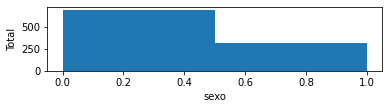

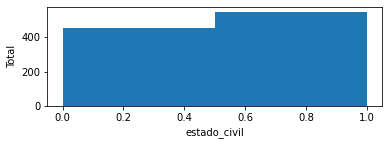

In [38]:
analisis_exploratorio(df=df_banco)



In [ ]:
#Tu función analisis_exploratorio() y tu código aqui
analisis_exploratorio()

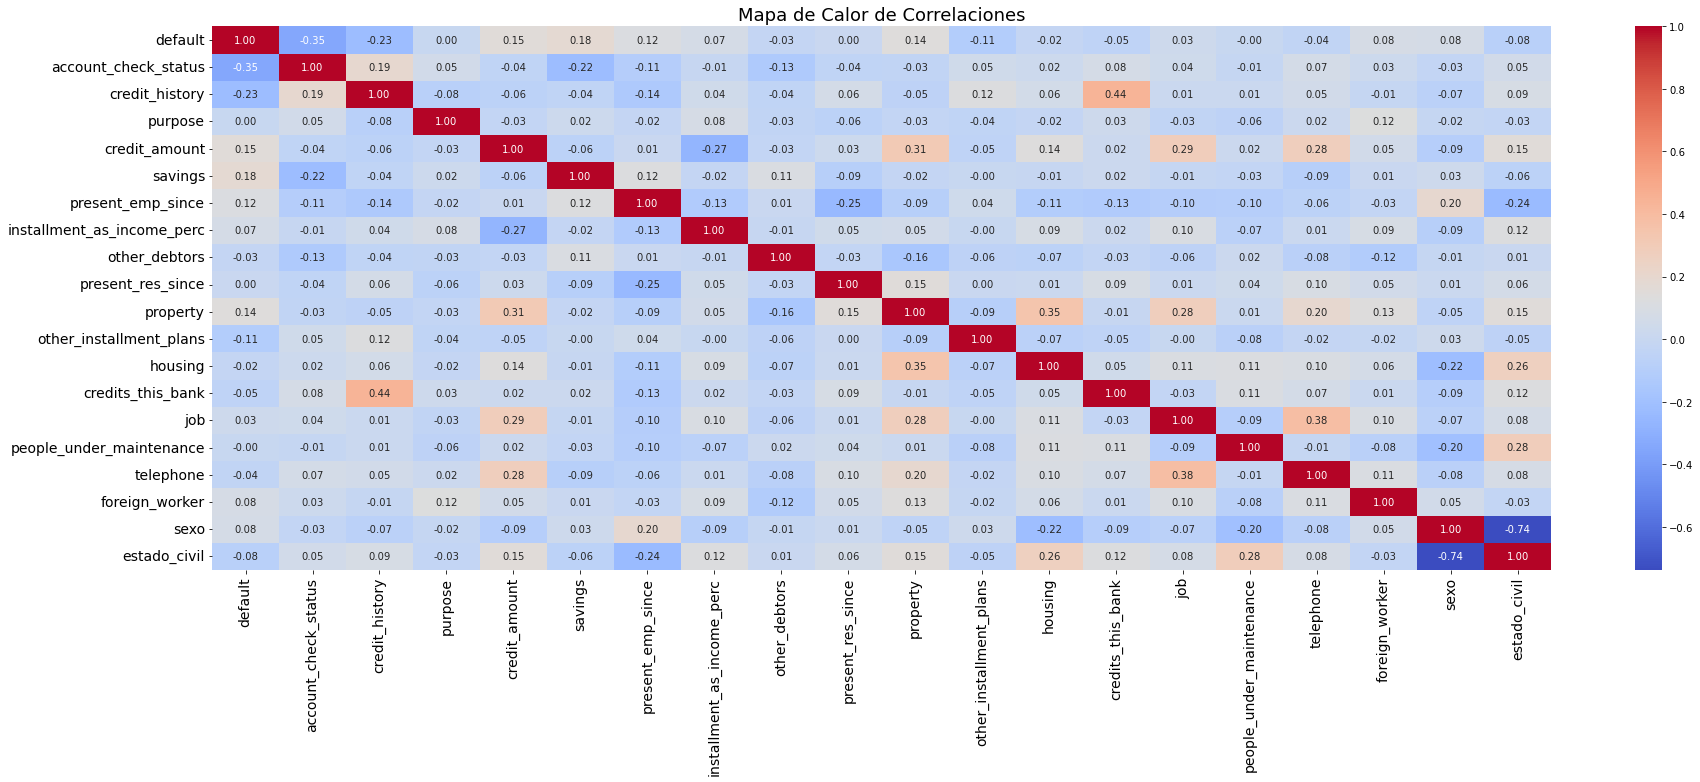

In [26]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [ ]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

#**4. Construcción de Modelos**


---


In [ ]:
#Tu función crea_modelos() y tu código aqui

In [ ]:
crea_modelos()
for i, model in enumerate(resultados['Model']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1-score'][i]}")
    print(f"AUC-ROC: {resultados['AUC-ROC'][i]}\n")

#**5. Evaluación y Selección del Modelo**


---


In [ ]:
#Tu función visualiza_resultados() y tu código aqui

In [ ]:
visualiza_resultados()